In [1]:
from dotenv import load_dotenv

In [2]:
load_dotenv

<function dotenv.main.load_dotenv(dotenv_path: Union[str, ForwardRef('os.PathLike[str]'), NoneType] = None, stream: Optional[IO[str]] = None, verbose: bool = False, override: bool = False, interpolate: bool = True, encoding: Optional[str] = 'utf-8') -> bool>

In [3]:
import os
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI()

In [5]:
llm.invoke("Hi, how are you?")

AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 13, 'total_tokens': 44, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BqImqVgnx1o6d7ahNhRW5Uv5c1WlM', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--ac485697-d2d4-4e31-85a6-be59749fa2a1-0', usage_metadata={'input_tokens': 13, 'output_tokens': 31, 'total_tokens': 44, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

_____________

Agent -> LLM + tool, where LLm is brain and Tool is action.
```
        __________
        |        |
        | LLM    | <--- Prompt
        __________
         / /    \
        / /      \
 __________     _________
 |        |     |       |
 |  Tool  |     | END   |
___________     _________

```

____________

#### MULTIAGENT

- More than one Agent.
- Multiple Agent is talking to each other.

1. Network
2. Supervisor ---> Hierarchical Pattern

__________

#### EXAMPLE: Travel Planner

- Hotel Booking
- Best Restaurant


1. Simple Tool Calling:

```
                        __________
                        |        |
                        | LLM    | <--- Prompt
                        __________
                        / /    \
                       / /      \
                __________     _________
                |        |     |       |
                |ToolNode|     | END   |
                ___________     _________
            Hotel Booking
            Restaurant Finder
```

2. MultiAgent System

We delegate the task to two different agents (Known as ```Hand Off```)
```
Hotel Booking           Restaurant Finder Agent
_____________              ______________
|   LLM     |              |    LLM     | 
|   | |     |              |    | |     |
|   | |     | ------------ |    | |     |
|   | |     |              |    | |     |
|   | |     |              |    | |     |
|   Tool    |              |    Tool    |
_____________              ______________

````
Every Agent has their own React Agent. \
There can be N number of Agents.


_____________

#### 1. Network Multi Agent (also known as Collaborative Agent)
```
    question ---->  ----------          ----------
                    |        | -------> |        |
                    | Agent 1| <------- | Agent 2|
                    ----------          ----------
                    multiplication      Addition

    Example: AI + WebDev tool like ChatGPT.

    Task => AI dev or Web Dev? ---->  ----------          ----------
                                      |        | -------> |        |
                                      | Agent 1| <------- | Agent 2|
                                      ----------          ----------
                                        WebDev              AI Dev
```
#### 2. Supervisor MultiAgent

```
                        -------------
                        |Supervisor |  <---- Director
                        |  Agent    |
                        -------------
                       //     ||     \\
                      //      ||      \\
                     //       ||       \\
              ----------   ----------   ----------
              |        |   |        |   |        |
              | Agent 1|   | Agent 2|   | Agent 3|
              ----------   ----------   ----------
            Manager 1      Manager 2     Manager 3
                
```
#### 3. Hierarchical MultiAgent -> Extension of Supervisor Agent. (Multiple Hierarchy)
```
                        -------------
                        |Supervisor |  <---- Director
                        |  Agent    |
                        -------------
                       //     ||     \\
                      //      ||      \\
                     //       ||       \\
              ----------   ----------   ----------
              |        |   |        |   |        |
              | Agent 1|   | Agent 2|   | Agent 3|
              ----------   ----------   ----------
            Manager 1      Manager 2     Manager 3
                /|\             /|\         /|\
               / | \           / | \       / | \
              /  |  \         /  |  \     /  |  \ 
```
___________________________

#### Network Agent

Question: I want to travel USA for Business purpose, can you book a cheaper flight with 3 star hotel and give me a 3-days iternary plan.
```
    question ---->  Hotel Booking               Flight Booking
                    _____________              ______________
                    |   LLM     |              |    LLM     | 
                    |   | |     |              |    | |     |
                    |   | |     | <----------- |    | |     |
                    |   | |     | -----------> |    | |     |
                    |   | |     |              |    | |     |
                    |   Tool    |              |    Tool    |
                    _____________              ______________
                        Agent 1                     Agent 2
                               /\ \           /\ /
                                \  \          / /
                                 \ \/        / \/
                                 Iternary Planner
                                _____________              
                                |   LLM     |              
                                |  /| |     |             
                                |   | |     |              
                                |   | |     |              
                                |   | |/    |              
                                |   Tool    |          
                                _____________              
                                    Agent 3                 
Handng off the task from one agent to each other based on the complexity of the task.

```
_______


In [5]:
from langgraph.types import Command

# to send command from one agent to another agent

In [ ]:

# create_react_agent is an inbuilt class provided by langgraph to create a react agent.


In [7]:
def add_number(state):
    result = state["num1"] + state["num2"]
    print(f"The result of {state['num1']} + {state['num2']} is {result}")
    return Command(goto="multiply", update= {"sum":result})
    # Using the ```Command``` to send the result to the next agent.
    # ```goto``` direct to the next agent specified.
    # ```update``` is the updated state.

In [8]:
state={"num1":10, "num2":20}

In [9]:
add_number(state)

The result of 10 + 20 is 30


Command(update={'sum': 30}, goto='multiply')

___________

#### Creating a dummy Multiagent for Network/Collaborative for example purposes

In [10]:
from langchain_core.tools import tool

In [14]:
from langchain_core.pydantic_v1 import BaseModel, Field

@tool
def transfer_to_multiplication_expert():
    """Ask multiplication agent for help"""
    return

In [15]:
@tool
def transfer_to_addition_expert():
    """Ask addition agent for help"""
    return

In [16]:
llm_with_tool = llm.bind_tools([transfer_to_addition_expert])

In [17]:
response = llm_with_tool.invoke("hi")

In [18]:
response.content

'Hello! How can I assist you today?'

In [19]:
response.tool_calls

[]

In [20]:
response = llm_with_tool.invoke("what is 2 multiplied by 3?")

In [21]:
response.content

''

In [22]:
response.tool_calls

[{'name': 'transfer_to_addition_expert',
  'args': {},
  'id': 'call_FMqa8k6YMwKKBgZf8JhD7e0B',
  'type': 'tool_call'}]

In [23]:
from langgraph.graph import StateGraph, MessagesState, START, END
from typing import Literal

In [24]:
def addition_expert(state:MessagesState)-> Command[Literal["multiplication_expert", "__end__"]]:
    
    system_prompt = (
        "You are an addition expert, you can ask the multiplication expert for help with multiplication."
        "Always do your portion of calculation before the handoff."
    )
    
    messages = [{"role": "system", "content": system_prompt}] + state["messages"]
    
    
    ai_msg = llm.bind_tools([transfer_to_multiplication_expert]).invoke(messages)
    
    
    if len(ai_msg.tool_calls) > 0:
        tool_call_id = ai_msg.tool_calls[-1]["id"]
        tool_msg = {
            "role": "tool",
            "content": "Successfully transferred",
            "tool_call_id": tool_call_id,
        }
        
        return Command(
            goto="multiplication_expert", update={"messages": [ai_msg, tool_msg]}
        )
    return {"messages": [ai_msg]}

In [25]:
# system_prompt = (
#         "You are an addition expert, you can ask the multiplication expert for help with multiplication."
#         "Always do your portion of calculation before the handoff."
#     )

# messages = [{"role": "system", "content": system_prompt}] + ["can you tell me the addition of 2 and 2?"]

# Output of how the final message looks like:
# [{'role': 'system',
#   'content': 'You are an addition expert, you can ask the multiplication expert for help with multiplication.Always do your portion of calculation before the handoff.'},
#  'can you tell me the addition of 2 and 2?']

In [26]:
##Agent2
def multiplication_expert(state:MessagesState)-> Command[Literal["addition_expert", "__end__"]]:
    
    system_prompt = (
        "You are a multiplication expert, you can ask an addition expert for help with addition. "
        "Always do your portion of calculation before the handoff."
    )
    
    messages = [{"role": "system", "content": system_prompt}] + state["messages"]
    
    ai_msg = llm.bind_tools([transfer_to_addition_expert]).invoke(messages)
    
    if len(ai_msg.tool_calls) > 0:
        tool_call_id = ai_msg.tool_calls[-1]["id"]
        tool_msg = {
            "role": "tool",
            "content": "Successfully transferred",
            "tool_call_id": tool_call_id,
        }
        return Command(goto="addition_expert", update={"messages": [ai_msg, tool_msg]})
    return {"messages": [ai_msg]}

In [ ]:
# Command(goto="addition_expert", update={"messages": [ai_msg, tool_msg]})
# This is part of LangGraph's routing mechanism and serves a different purpose than add_conditional_edges(). 
# 
# Here's the key differences:
# Command Routing vs Static Edges:
# add_conditional_edges(): Creates static, predefined paths between nodes based on conditions
# Command(goto=...): Provides dynamic, runtime routing where agents can decide their next destination

# Key Benefits of Command Routing:
# More flexible routing - agents can choose different destinations based on complex logic
# Can carry state updates along with routing decisions
# Better for multi-agent systems where routing isn't fixed
# Allows for adaptive workflows


In [27]:
graph = StateGraph(MessagesState)

In [28]:
graph.add_node("addition_expert", addition_expert)
graph.add_node("multiplication_expert", multiplication_expert)

In [29]:
graph.add_edge(START, "addition_expert")

In [30]:
# Compile the graph
app = graph.compile()

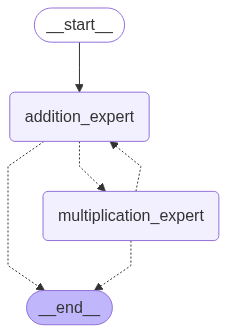

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
app.invoke({"messages":[("user","what's 3 + (5 * 12). Provide me the output")]})

{'messages': [HumanMessage(content="what's 3 + (5 * 12). Provide me the output", additional_kwargs={}, response_metadata={}, id='de1aa745-f33d-40ad-bb07-ecc2e3fd0241'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_aLKsuGFEVUpLtgqghK4L3WYU', 'function': {'arguments': '{}', 'name': 'transfer_to_multiplication_expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 85, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BqKaU1j2KOgsHweTsV3SLf5ZOIdeu', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0b2527f9-ef4f-445c-962d-a05416cf7220-0', tool_calls=[{'name': 'transfer_to_multiplication_expert', 'args': {},

In [33]:
app.invoke({"messages":[("user","what's (3 + 5) * 12. Provide me the output")]})

{'messages': [HumanMessage(content="what's (3 + 5) * 12. Provide me the output", additional_kwargs={}, response_metadata={}, id='ea4fd2ae-c669-43e9-8376-02478caffd96'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Y3jLykWEbIIFk0142TqVw0Ya', 'function': {'arguments': '{}', 'name': 'transfer_to_multiplication_expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 86, 'total_tokens': 100, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BqKbBMYVKj5BF16QUylTlq9ASQvGJ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--eea6ac7d-2d1e-40a4-80f9-5d9f6b74c6f8-0', tool_calls=[{'name': 'transfer_to_multiplication_expert', 'args': {}

_________

#### Real-time Tool

In [39]:
# from langchain_community.tools import DuckDuckGoSearchRun
from langchain_community.tools import BraveSearch

In [40]:
os.environ["BRAVE_SEARCH_API_KEY"] = os.getenv("BRAVE_SEARCH_API_KEY")

In [41]:
# search_tool = DuckDuckGoSearchRun()

search_tool = BraveSearch()


In [43]:
search_tool.invoke("Who is the PM of UK?")

'[{"title": "Keir Starmer - Wikipedia", "link": "https://www.gov.uk/government/ministers/prime-minister#:~:text=Current%20role%20holder-,The%20Rt%20Hon%20Sir%20Keir%20Starmer%20KCB%20KC%20MP,Minister%20on%205%20July%202024.", "snippet": "We cannot provide a description for this page right now"}, {"title": "Prime Minister of the United Kingdom - Wikipedia", "link": "https://en.wikipedia.org/wiki/Prime_Minister_of_the_United_Kingdom", "snippet": "The procedure was in practice until 1953 when PMQs were restricted to Tuesdays and Thursdays only to assist Winston Churchill who was 78-years old. The prime minister also appears before the Liaison Committee to answer questions about public policy. The personal protection of the prime minister and former prime ministers is ..."}, {"title": "Keir Starmer becomes British prime minister in landslide Labour Party victory. Experts analyze how the result unfolded", "link": "https://news.northeastern.edu/2024/07/05/keir-starmer-prime-minister/", "snip

In [50]:
from langchain_experimental.utilities import PythonREPL

# REPL stands for "Read-Eval-Print Loop". It's an interactive programming environment that:
# Reads user input
# Evaluates the input
# Prints the result
# Loops back to read more input

# The Python REPL is most commonly accessed by:
# Running python in your terminal
# Using interactive notebooks like Jupyter/IPython
# Using Python shells in IDEs

In [51]:
repl = PythonREPL()

In [63]:
code = """
x = 5
y = x * 2
print(y)
"""

In [53]:
repl.run(code)

'10\n'

In [54]:
from typing import Annotated

#### Example:

In [58]:
@tool
def python_repl_tool( code: Annotated[str, "The python code to execute to generate your chart."],):
    
    """Use this tool to execute python code. If you want to see the output of a value, you should print it out with `print(...)`. This is visible to the user."""
    
    try: 
        result = repl.run(code)
    except Exception as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed: \n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    return (
        result_str + "\n\nIf you have completed all tasks, respond with FINAL ANSWER."
    )

<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
/var/folders/dv/7swn0_8d5434v2xwcvtw_vsc0000gn/T/ipykernel_12618/2745436165.py:11: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed: \n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
/var/folders/dv/7swn0_8d5434v2xwcvtw_vsc0000gn/T/ipykernel_12618/2745436165.py:11: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed: \n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"


In [59]:
python_repl_tool

StructuredTool(name='python_repl_tool', description='Use this tool to execute python code. If you want to see the output of a value, you should print it out with `print(...)`. This is visible to the user.', args_schema=<class 'langchain_core.utils.pydantic.python_repl_tool'>, func=<function python_repl_tool at 0x129139da0>)

In [64]:
result =python_repl_tool.invoke(code)

In [65]:
print(result)

Successfully executed: 
\`\`\`python

x = 5
y = x * 2
print(y)

\`\`\`
Stdout: 10


If you have completed all tasks, respond with FINAL ANSWER.


#### Real time example Continued..

In [82]:
from langgraph.graph import MessagesState, START, END
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.types import Command

In [89]:
def make_system_prompt(instruction:str) -> str:
    return(
        "You are a helpful AI assistant, collaborating with other assistants."
        "Use the provided tools to progress towards answering the question."
        "If you are unable to fully answer, that's okay, another assistant with different tools will help where you left off. Execute what you can to make progress."
        "If you or any other assistants have the final answer or deliverable, prefix your response with Final Answer so the team knows to stop."
        f"\n{instruction}"
    )

In [91]:
# For example, this is how the final prompt looks like

make_system_prompt("You can only do research. You are working with a chart generator colleague.")


"You are a helpful AI assistant, collaborating with other assistants.Use the provided tools to progress towards answering the question.If you are unable to fully answer, that's okay, another assistant with different tools will help where you left off. Execute what you can to make progress.If you or any other assistants have the final answer or deliverable, prefix your response with Final Answer so the team knows to stop.\nYou can only do research. You are working with a chart generator colleague."

```"You are a helpful AI assistant, collaborating with other assistants.Use the provided tools to progress towards answering the question.If you are unable to fully answer, that's okay, another assistant with different tools will help where you left off. Execute what you can to make progress.If you or any other assistants have the final answer or deliverable, prefix your response with Final Answer so the team knows to stop.\nYou can only do research. You are working with a chart generator colleague."```

In [92]:
def get_next_node(last_message: BaseMessage, goto: str):
    if "FINAL ANSWER" in last_message.content:
        #Any agent decided the work is done
        return END
    return goto

In [99]:
# Agent 1

def research_node(state:MessagesState) -> Command[Literal["chart_generator", END]]:
    research_agent = create_react_agent(llm, 
                       tools=[search_tool],
                       prompt=make_system_prompt(
                           "You can only do research. You are working with a chart generator colleague."
                           ),
                           )
    result = research_agent.invoke(state)
    
    goto = get_next_node(result["messages"][-1], "chart_generator")
    
    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="researcher")
    return Command(update={"messages": result["messages"]}, goto = goto)

In [100]:
# Agent 2

def chart_node(state:MessagesState) -> Command[Literal["researcher", END]]:
    chart_agent = create_react_agent(llm, 
                       tools=[python_repl_tool],
                       prompt=make_system_prompt(
                        "You can only generate charts. You are working with a researcher colleague."
                        ),
                )
    result = chart_agent.invoke(state)
    
    goto = get_next_node(result["messages"][-1], "researcher")

    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="chart_generator")
    return Command(update={"messages": result["messages"]}, goto = goto)

In [101]:
workflow = StateGraph(MessagesState)

workflow.add_node("researcher", research_node)
workflow.add_node("chart_generator", chart_node)

workflow.add_edge(START, "researcher")

app = workflow.compile()

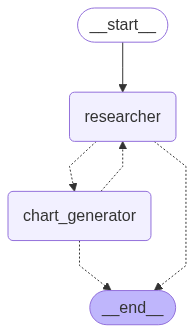

In [102]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

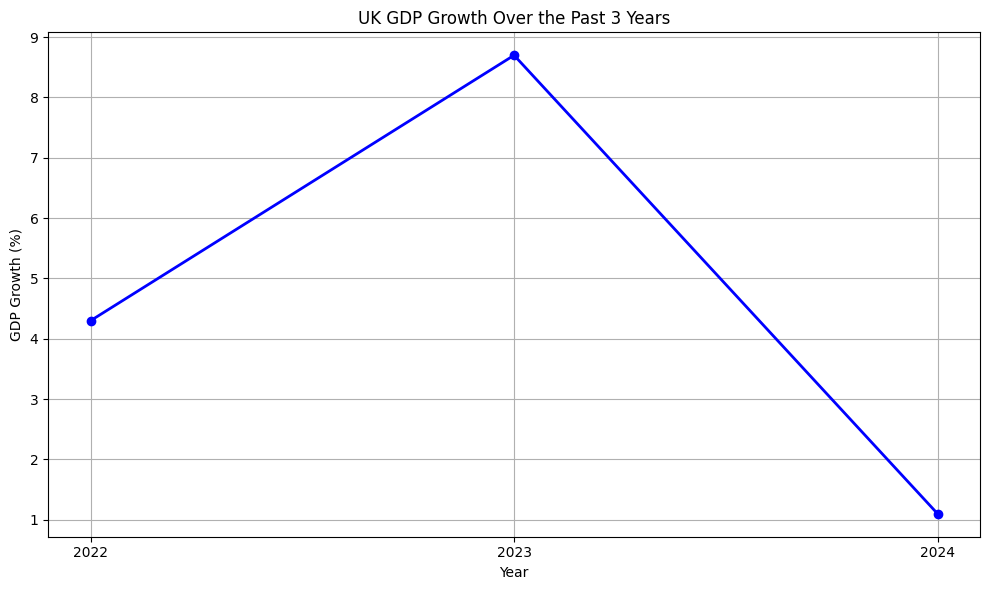

Task chart_generator with path ('__pregel_pull', 'chart_generator') wrote to unknown channel branch:to:__end__, ignoring it.


{'messages': [HumanMessage(content="Get the UK's GDP over the past 3 years, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='183f2fb3-f25d-46da-81ff-bd738787a4b2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_IVvTqm5S5xOnsJzvBmd58OKt', 'function': {'arguments': '{"query":"UK GDP by year for the past 3 years"}', 'name': 'brave_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 183, 'total_tokens': 207, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BqefcdZBa3ol4VdZ0t9MhoF9TvQq8', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c5fb6673-7163-4caf-bf8b-

In [105]:
app.invoke({"messages": [("user", "Get the UK's GDP over the past 3 years, then make a line chart of it. Once you make the chart, finish.")],})

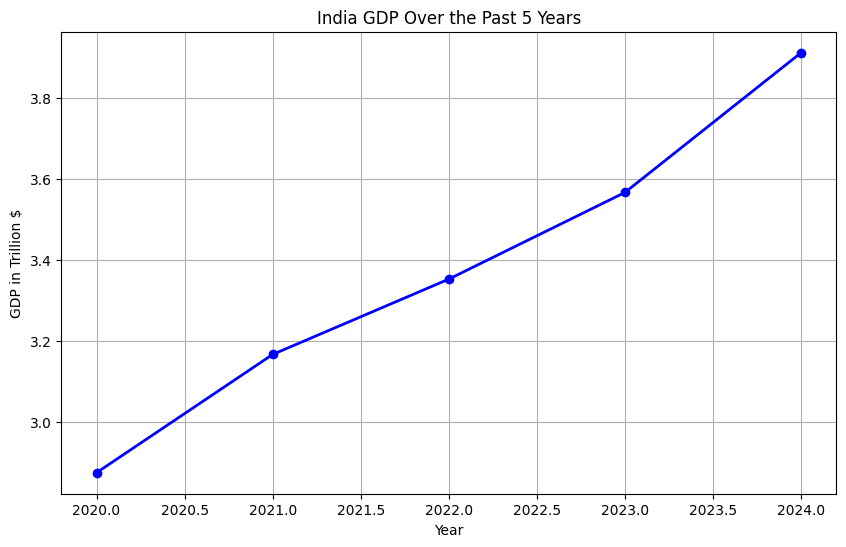

Task researcher with path ('__pregel_pull', 'researcher') wrote to unknown channel branch:to:__end__, ignoring it.


{'messages': [HumanMessage(content="Get the India's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='02eb4b83-3ddf-45c7-826a-0c8ec860107c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fDnb1CwpafBhknvIpz5MnTP5', 'function': {'arguments': '{"query":"India GDP by year"}', 'name': 'brave_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 183, 'total_tokens': 201, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BqemRnSsuRq3ElTSI1uXq4vOdADma', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3851139a-adc3-4406-9b17-e63cd0b71a68-0'

In [109]:
app.invoke({"messages": [("user", "Get the India's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.")],})